In [1]:
import csv

data = []

with open('./ml-latest-small/ratings.csv') as ratings:
    rating_reader = csv.reader(ratings, delimiter=',')
    line_count = 0
    for row in rating_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            # row is a list of string with the form [userId, movieId, rating, timestamp]
            data.append(row)
            line_count += 1
    print('Processed ' + str(line_count) + ' rows.')

Processed 100837 rows.


In [2]:
genres=[]
with open('./ml-latest-small/movies.csv',errors='ignore') as ratings:
    rating_reader = csv.reader(ratings, delimiter=',')
    line_count = 0
    for row in rating_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            # row is a list of string with the form [userId, movieId, rating, timestamp]
            genres.append(row)
            line_count += 1
    print('Processed ' + str(line_count) + ' rows.')

Processed 9743 rows.


In [3]:
print(genres[0])

['1', 'Toy Story (1995)', 'Adventure|Animation|Children|Comedy|Fantasy']


In [4]:
tags=[]
with open('./ml-latest-small/tags.csv',errors='ignore') as ratings:
    rating_reader = csv.reader(ratings, delimiter=',')
    line_count = 0
    for row in rating_reader:
        if line_count == 0:
            line_count += 1
            continue
        else:
            # row is a list of string with the form [userId, movieId, rating, timestamp]
            tags.append(row)
            line_count += 1
    print('Processed ' + str(line_count) + ' rows.')

Processed 3684 rows.


In [5]:
print(tags[0])

['2', '60756', 'funny', '1445714994']


In [59]:
from collections import defaultdict
tag=set()
movieTags=defaultdict(set)
idToTags=defaultdict(set)
for i in tags:
#     print(i[1],i[2])
    idToTags[i[1]].add(i[2])
    movieTags[i[1]].add(i[2])
    tag.add(i[2])
print(len(tag))

1589


In [7]:
from collections import Counter
tagLengths=[]
movieTagLen=defaultdict(set)
for k,v in movieTags.items():
    tagLengths.append(len(v))
    movieTagLen[len(v)].add(k)
print(movieTagLen[173])
Counter(tagLengths)


{'296'}


Counter({1: 1016,
         2: 239,
         3: 98,
         4: 47,
         5: 37,
         6: 43,
         7: 26,
         8: 24,
         9: 13,
         10: 7,
         11: 2,
         12: 2,
         13: 3,
         14: 1,
         15: 1,
         17: 2,
         18: 2,
         19: 2,
         21: 1,
         31: 1,
         32: 2,
         40: 1,
         48: 1,
         173: 1})

In [8]:
nameToGenre=defaultdict(set)
idToName=defaultdict(str)
idToGenre=defaultdict(set)
for i in genres:
    g = i[2].split("|")
    for a in g:
        idToGenre[i[0]].add(a)
        nameToGenre[i[1]].add(a)
    idToName[i[0]]=i[1]
    

In [9]:
idToName['296']

'Pulp Fiction (1994)'

In [10]:
movieTags['296']

{'1990s',
 'AWESOME',
 'Black comedy',
 'Harvey Keitel',
 'Highly quotable',
 'John Travolta',
 'Mafia',
 "Palme d'Or",
 'Quentin Tarantino',
 'Quotable',
 'Roger Avary',
 'Samuel L. Jackson',
 'Steve Buscemi',
 'Tarantino',
 'Uma Thurman',
 'achronological',
 'action',
 'action packed',
 'aggressive',
 'amazing',
 'amazing dialogues',
 'anthology',
 'assassin',
 'atmospheric',
 'bad ass',
 'bad language',
 'bad-ass',
 'bible',
 'biblical references',
 'big boys with guns',
 'big name actors',
 'black humor',
 'black humour',
 'blood',
 'blood splatters',
 'bloody',
 'bruce willis',
 'brutality',
 'casual violence',
 'character development',
 'characters',
 'classic',
 'classic movie',
 'coke',
 'comedy',
 'conversation',
 'cool',
 'cool style',
 'crime',
 'crime scene scrubbing',
 'cult',
 'cult classic',
 'cult film',
 'dance',
 'dancing',
 'dark',
 'dark comedy',
 'dark humor',
 'dialogue',
 'different',
 'diner',
 'disjointed timeline',
 'disturbing',
 'drama',
 'drug overdose',
 '

In [61]:
genreToTags=defaultdict(set)
for i in genres:
    gs=idToGenre[i[0]]
    ts=idToTags[i[0]]
    for g in gs:
        for t in ts:
            genreToTags[g].add(t)

In [62]:
for k,v in genreToTags.items():
    print(k,len(v))

IMAX 127
Drama 1028
Thriller 611
Romance 421
Sci-Fi 390
Musical 88
Crime 492
Animation 150
Film-Noir 42
(no genres listed) 3
Fantasy 202
Adventure 396
Action 507
Mystery 246
Documentary 84
War 115
Western 55
Comedy 673
Horror 146
Children 123


In [102]:
tagRating=defaultdict(list)
for i in data:
    mid = i[1]
    ts=idToTags[mid]
    for t in ts:
        tagRating[t].append(i[2])

In [153]:
tagAvgRating=defaultdict(int)
for k,v in tagRating.items():
    li=[float(i) for i in v]
    tagAvgRating[k]=np.mean(li)

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [205]:
s = [(k, tagAvgRating[k]) for k in sorted(tagAvgRating, key=tagAvgRating.get, reverse=True)]

In [155]:
for k,v in s[:5]:
    print(k,'\t',v,'\t',len(tagRating[k]))    
for k,v in s[-5:]:
    print(k,'\t',v,'\t',len(tagRating[k]))    

creativity 	 5.0 	 1
procedural 	 5.0 	 1
free to download 	 5.0 	 1
no dialogue 	 5.0 	 1
human rights 	 5.0 	 1
thought provoking 	 4.75 	 4
Dystopia 	 4.75 	 4
jon hamm 	 4.75 	 4
movies about movies 	 4.666666666666667 	 3
prejudice 	 4.545454545454546 	 11
Teen movie 	 2.409090909090909 	 22
batman 	 2.34375 	 16
ben affleck 	 2.34375 	 16
flood 	 2.25 	 2
jungle 	 2.1363636363636362 	 11
SNL 	 2.1 	 10
Tokyo 	 2.0 	 1
stage 	 1.75 	 2
shark 	 1.4166666666666667 	 6
symbolic 	 0.5 	 1


In [107]:
genreRating=defaultdict(list)
for i in data:
    mid = i[1]
    gs=idToGenre[mid]
    for g in gs:
        genreRating[g].append(i[2])
genreAvgRating=defaultdict(int)
for k,v in genreRating.items():
    li=[float(i) for i in v]
    genreAvgRating[k]=np.mean(li)        

In [203]:
s = [(k, genreAvgRating[k]) for k in sorted(genreAvgRating, key=genreAvgRating.get, reverse=True)]
for k,v in s[:10]:
    print(k,'\t',v,'\t',len(genreRating[k]))    
for k,v in s[-10:]:
    print(k,'\t',v,'\t',len(genreRating[k]))    

Film-Noir
War
Documentary
Crime
Drama
Mystery
Animation
IMAX
Western
Musical
Adventure
Romance
Thriller
Fantasy
(no genres listed)
Sci-Fi
Action
Children
Comedy
Horror


In [231]:
s = [(k, tagAvgRating[k]) for k in sorted(tagAvgRating, key=tagAvgRating.get, reverse=True)]
s1 = []
for k,v in s:
    if len(tagRating[k])>=30: s1.append((k,v))
for k,v in s1[:16]:
    print(k,'\t',v,'\t',len(tagRating[k]))    
for k,v in s1[-15:]:
    print(k,'\t',v,'\t',len(tagRating[k]))    

wrongful imprisonment 	 4.429022082018927 	 317
prison 	 4.393041237113402 	 388
Screwball 	 4.366666666666666 	 30
Morgan Freeman 	 4.344783715012722 	 393
Middle East 	 4.3 	 45
imaginary friend 	 4.272935779816514 	 218
mind-blowing 	 4.272935779816514 	 218
Palahnuik 	 4.272935779816514 	 218
David Fincher 	 4.272935779816514 	 218
TERRORISM 	 4.272935779816514 	 218
societal criticism 	 4.272935779816514 	 218
psychological thriller 	 4.272935779816514 	 218
Chuck Palahniuk 	 4.272935779816514 	 218
double life 	 4.272935779816514 	 218
challenging 	 4.272935779816514 	 218
consumerism 	 4.272935779816514 	 218
Europe 	 3.34 	 50
Disaster 	 3.321138211382114 	 123
soccer 	 3.3 	 40
Emma 	 3.293269230769231 	 104
lawyers 	 3.214814814814815 	 135
cameo:Whoopi Goldberg 	 3.1515151515151514 	 33
plot holes 	 3.1508620689655173 	 116
Audrey Tautou 	 3.122448979591837 	 49
prequel 	 3.107142857142857 	 140
M. Night Shyamalan 	 3.1 	 35
Dr. Seuss 	 3.0454545454545454 	 33
Ghosts 	 3.0 	

In [157]:
movieRating=defaultdict(list)
for i in data:
    movieRating[i[1]].append(i[2])
movieAvgRating=defaultdict(int)
for k,v in movieRating.items():
    li=[float(i) for i in v]
    movieAvgRating[k]=np.mean(li)        

In [170]:
s = [(k, movieAvgRating[k]) for k in sorted(movieAvgRating, key=movieAvgRating.get, reverse=True)]
s1 = []
for k,v in s:
    if len(movieRating[k])>=50: s1.append((k,v))
for k,v in s1[:5]:
    print(idToName[k],k,'\t',v,'\t',len(movieRating[k]))    
for k,v in s1[-5:]:
    print(idToName[k],'\t',v,'\t',len(movieRating[k]))    

Shawshank Redemption, The (1994) 318 	 4.429022082018927 	 317
Godfather, The (1972) 858 	 4.2890625 	 192
Fight Club (1999) 2959 	 4.272935779816514 	 218
Cool Hand Luke (1967) 1276 	 4.271929824561403 	 57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) 750 	 4.268041237113402 	 97
Johnny Mnemonic (1995) 	 2.6792452830188678 	 53
Judge Dredd (1995) 	 2.6693548387096775 	 62
City Slickers II: The Legend of Curly's Gold (1994) 	 2.6454545454545455 	 55
Coneheads (1993) 	 2.4206349206349205 	 63
Wild Wild West (1999) 	 2.207547169811321 	 53


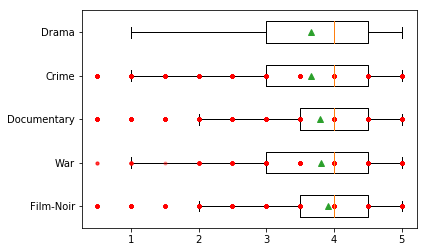

In [245]:
tmp = [float(i) for i in genreRating['Film-Noir']]
tmp2 = [float(i) for i in genreRating['War']]
tmp3 = [float(i) for i in genreRating['Documentary']]
tmp4 = [float(i) for i in genreRating['Crime']]
tmp5 = [float(i) for i in genreRating['Drama']]
plotdata=[tmp,tmp2,tmp3,tmp4,tmp5]
import matplotlib.pyplot as plt
yticks = ['Film-Noir','War','Documentary','Crime','Drama']
y= np.array([1,2,3,4,5])
fg=plt.figure()
plt.boxplot(plotdata, 0, '',0,showmeans=True)
plt.yticks(y, yticks)
for i in range(len(plotdata)):
        y = plotdata[i]
        x = [i]*len(y)
        plt.plot(y,x, 'r.', alpha=0.2)

plt.show()




In [ ]:
y= np.array([1,2,3,4,5])
fg=plt.figure()
plt.boxplot(plotdata, 0, '',0,showmeans=True)
plt.yticks(y, yticks)
for i in range(len(plotdata)):
        y = plotdata[i]
        x = [i]*len(y)
        plt.plot(y,x, 'r.', alpha=0.2)

plt.show()